In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors

In [2]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,:,:,:]

In [3]:
home_folder = '/nethome/manra003/analysis/dispersion/simulations/'

# ds3D=xr.open_zarr(home_folder+'Fwd_3D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr')
# ds2D=xr.open_zarr(home_folder+'Fwd_2D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr')
# dsdvm=xr.open_zarr(home_folder+'Fwd_DVM_Luderitz_117x117_Nov01-31_2017_1z_100days.zarr')
ds2D = xr.open_zarr(home_folder + "Fwd_2D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")
ds3D = xr.open_zarr(home_folder + "Fwd_3D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")  
# dsdvm = xr.open_zarr(home_folder + "Fwd_DVM_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 
dsdvm = xr.open_zarr(home_folder + "NewAug2023_DVM_BenguelaUpwR_1ov64_961x641res_Dec2017_1z_100days.zarr") 

dsbp = xr.open_zarr(home_folder + "Fwd_3D_BP_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 


# ds2D = xr.open_zarr(home_folder + "08Aug2023_2D_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr")
# ds3D = xr.open_zarr(home_folder + "08Aug2023_3D_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr")  
# dsdvm = xr.open_zarr(home_folder + "08Aug2023_DVM_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr") 
# dsbp = xr.open_zarr(home_folder + "08Aug2023_3D_BP_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1025.zarr") 

In [4]:
# OLD- Particles are getting deleted due to model indexing in the fieldset- expanded the fieldset. 
# need to avoid deletion to compute reliable CDF (pre 08-08-2023 simulation)
ds2D.lat[1020,:].values  

array([-30.2       , -30.09946036, -29.97157043, -29.82111922,
       -29.66024389, -29.48238574, -29.29036694, -29.0978138 ,
       -28.93659706, -28.8968628 , -28.93603263, -29.02183752,
       -29.1455534 , -29.28660588, -29.44403356, -29.61354178,
       -29.79821674, -29.98587527, -30.16243023, -30.31118229,
       -30.4187237 , -30.48889757, -30.53139939, -30.55997102,
       -30.56882268, -30.57605285, -30.56580265, -30.54013061,
       -30.51613871, -30.48211226, -30.4279225 , -30.32989047,
       -30.27936499, -30.23730836, -30.18347171, -30.1253541 ,
       -30.06892579, -30.0034305 , -29.93493999, -29.91756375,
       -29.90987611, -29.89208238, -29.85915371, -29.83813684,
       -29.80188786, -29.76568943, -29.76675745, -29.77899027,
       -29.79890538, -29.82682776, -29.8620222 , -29.89619303,
       -29.92049908, -29.94891824, -29.98905758, -30.05744666,
       -30.14533391, -30.23285194, -30.3112079 , -30.37093775,
       -30.41151914, -30.44651915, -30.47515936, -30.47

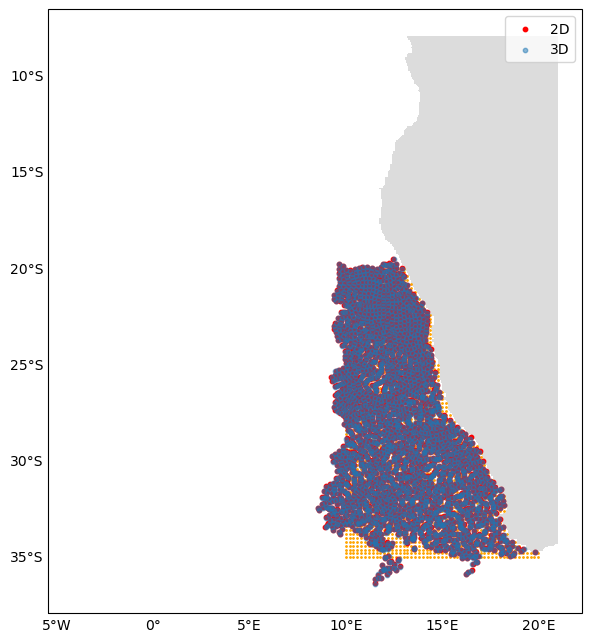

In [ ]:
custom_size=10
fig = plt.figure(figsize=(8,8), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = colors.ListedColormap(['gainsboro', 'white'])

# Near Amazon river- 4-5 month simulations
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
# ax.set_xlim(8,18)
# ax.set_ylim(-30,-20)
# ax.set_xlim(10,16)
# ax.set_ylim(-30,-21)
t_step=5
n=50000
# ax.scatter(ds2D['lon'][:,t_step], ds2D['lat'][:,t_step], s=1, c='red', label="2D")
# ax.scatter(ds3D['lon'][:,t_step], ds3D['lat'][:,t_step], s=0.1, alpha=0.5, label="3D")
ax.scatter(ds3D['lon'][:n,0], ds3D['lat'][:n,0], s=1, c='orange')
ax.scatter(ds2D['lon'][:n,t_step], ds2D['lat'][:n,t_step], s=10, c='red', label="2D")
ax.scatter(ds3D['lon'][:n,t_step], ds3D['lat'][:n,t_step], s=10, alpha=0.5, label="3D")
ax.legend()
plt.show()

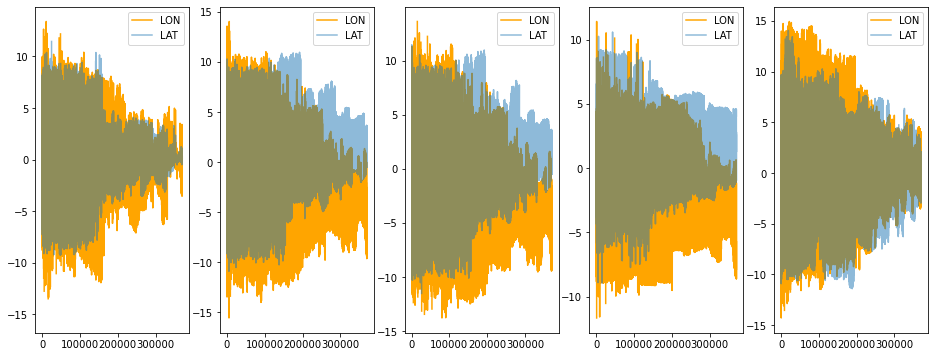

In [4]:
t_step=99

fig, ax= plt.subplots(ncols=5,nrows=1, figsize=(16,6))

ax[0].plot(ds2D['lon'][:, t_step]-ds3D['lon'][:, t_step], c='orange', label="LON")
ax[0].plot(ds2D['lat'][:, t_step]-ds3D['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[0].legend()
ax[1].plot(ds2D['lon'][:, t_step]-dsdvm['lon'][:, t_step], c='orange', label="LON")
ax[1].plot(ds2D['lat'][:, t_step]-dsdvm['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[1].legend()

ax[2].plot(ds3D['lon'][:, t_step]-dsdvm['lon'][:, t_step], c='orange', label="LON")
ax[2].plot(ds3D['lat'][:, t_step]-dsdvm['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[2].legend()

ax[3].plot(ds2D['lon'][:, t_step]-dsbp['lon'][:, t_step], c='orange', label="LON")
ax[3].plot(ds2D['lat'][:, t_step]-dsbp['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[3].legend()

ax[4].plot(dsdvm['lon'][:, t_step]-dsbp['lon'][:, t_step], c='orange', label="LON")
ax[4].plot(dsdvm['lat'][:, t_step]-dsbp['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[4].legend()



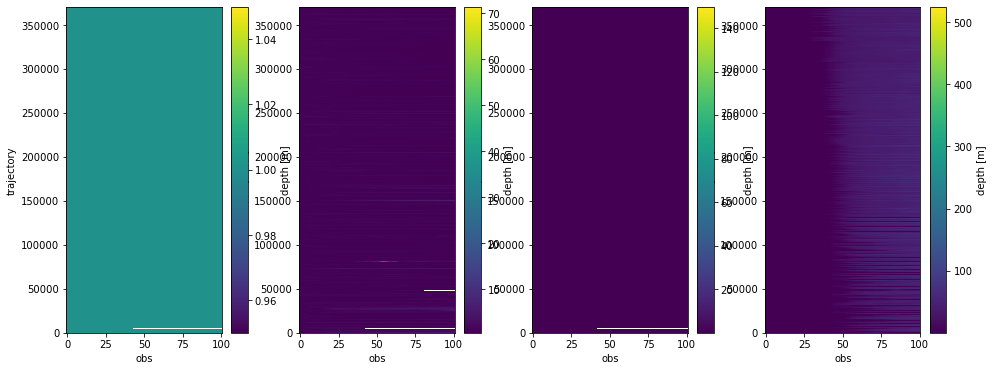

In [5]:
fig, ax= plt.subplots(ncols=4,nrows=1, figsize=(16,6))
ds2D.z.plot(ax=ax[0])

ds3D.z.plot(ax=ax[1])
dsdvm.z.plot(ax=ax[2])
dsbp.z.plot(ax=ax[3])

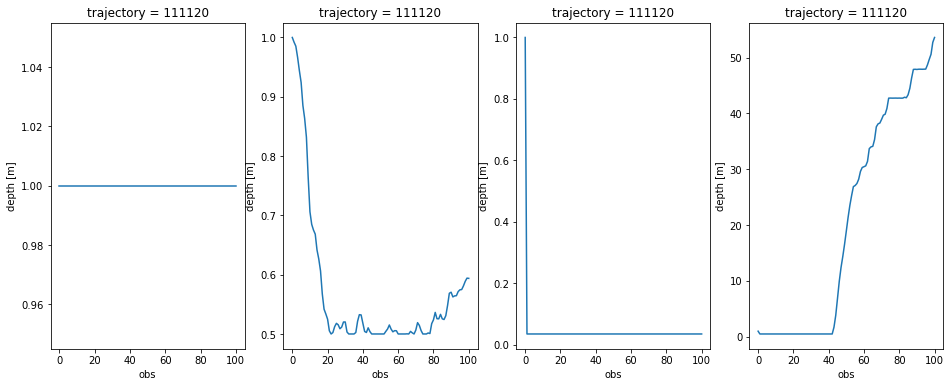

In [7]:
id = 111120

fig, ax= plt.subplots(ncols=4,nrows=1, figsize=(16,6))

ds2D.z[id,:].plot(ax=ax[0])
ds3D.z[id,:].plot(ax=ax[1])
dsdvm.z[id,:].plot(ax=ax[2])
dsbp.z[id,:].plot(ax=ax[3])



<h5>Assert depth values

In [11]:
assert np.min(ds2D.z[:,:])==1.0
assert np.max(ds2D.z[:,:])==1.0




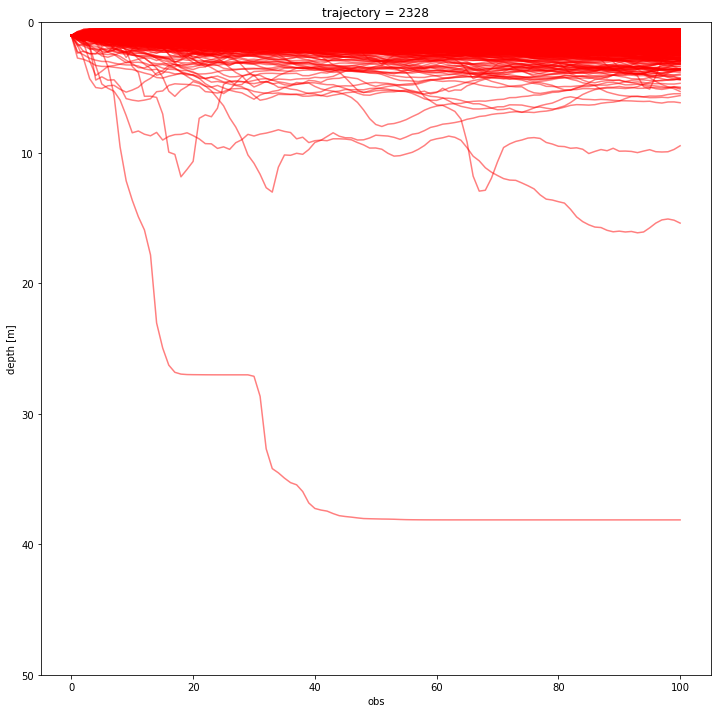

In [12]:
fig=plt.figure(figsize=(12,12))
ax=plt.axes()
for i in range(2329):
    ds3D.z[i,:].plot(ax=ax, alpha=0.5, c='red') #, label="P"+str(i)) 

ax.set_ylim(0,50)
# ax.legend()
ax.invert_yaxis()

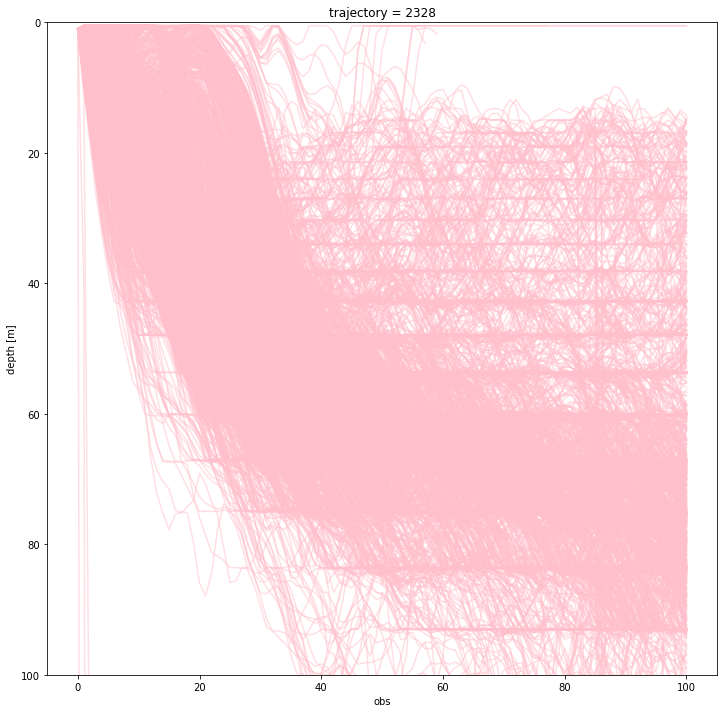

In [31]:
fig=plt.figure(figsize=(12,12))
ax=plt.axes()
for i in range(2329):
    dsbp.z[i,:].plot(ax=ax, alpha=0.5, c='pink') #, label="P"+str(i)) 

ax.set_ylim(0,100)
# ax.legend()
ax.invert_yaxis()

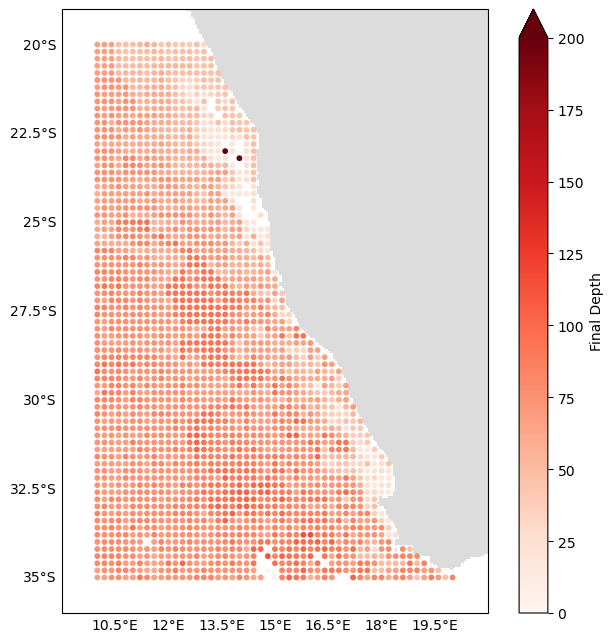

In [5]:
custom_size=10
fig = plt.figure(figsize=(8,8), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = colors.ListedColormap(['gainsboro', 'white'])

# Near Amazon river- 4-5 month simulations
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
ax.set_xlim(9, 21)
ax.set_ylim(-36, -19)
im=ax.scatter(dsbp['lon'][:,0].values, dsbp['lat'][:,0].values, c=dsbp['z'][:,-1].values, cmap="Reds", vmin=0, vmax=200,s=10)
cbar=fig.colorbar(im, ax=ax, label='Final Depth', extend='max')
plt.show()

<h3> Plot the final depth of all the particles- to highlight the particles that were deleted

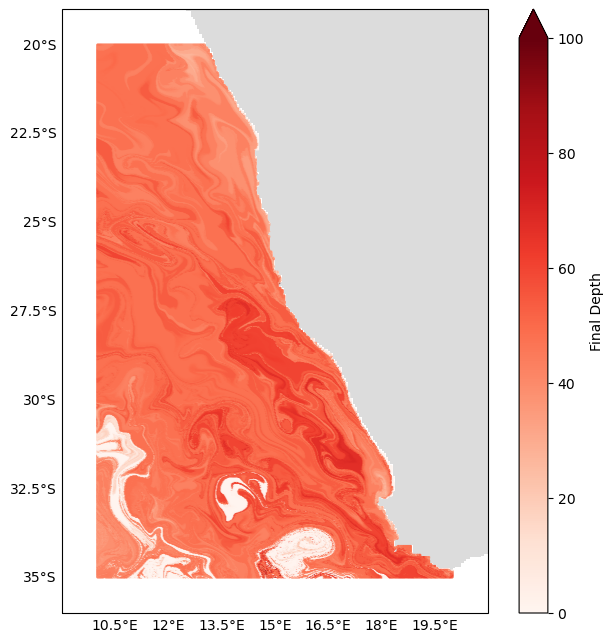

In [7]:
ds4 = xr.open_zarr(home_folder + "Fwd_3D_BP_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 
custom_size=10
fig = plt.figure(figsize=(8,8), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = colors.ListedColormap(['gainsboro', 'white'])

# Near Amazon river- 4-5 month simulations
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
ax.set_xlim(9, 21)
ax.set_ylim(-36, -19)
im=ax.scatter(ds4['lon'][:,0].values, ds4['lat'][:,0].values, c=ds4['z'][:,-1].values, cmap="Reds", vmin=0, vmax=100,s=0.1)
cbar=fig.colorbar(im, ax=ax, label='Final Depth', extend='max')
plt.show()

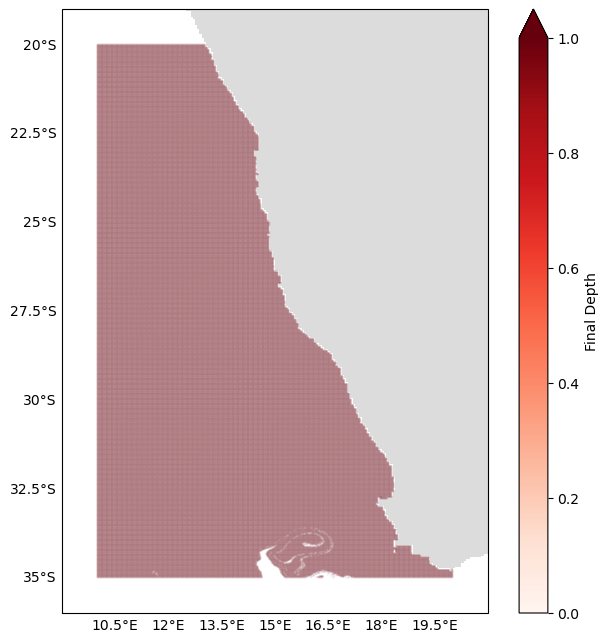

In [10]:
# ds4 = xr.open_zarr(home_folder + "Fwd_3D_BP_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 
custom_size=10
fig = plt.figure(figsize=(8,8), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = colors.ListedColormap(['gainsboro', 'white'])

# Near Amazon river- 4-5 month simulations
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
ax.set_xlim(9, 21)
ax.set_ylim(-36, -19)
im=ax.scatter(dsdvm['lon'][:,0].values, dsdvm['lat'][:,0].values, c=ds2D['z'][:,-1].values, cmap="Reds", vmin=0, vmax=1,s=0.001)
cbar=fig.colorbar(im, ax=ax, label='Final Depth', extend='max')
plt.show()

2D:  1.0 1.0
3D:  0.5 71.4704194866089
DVM:  0.5 150.0
BP:  0.5 267.7953760639225


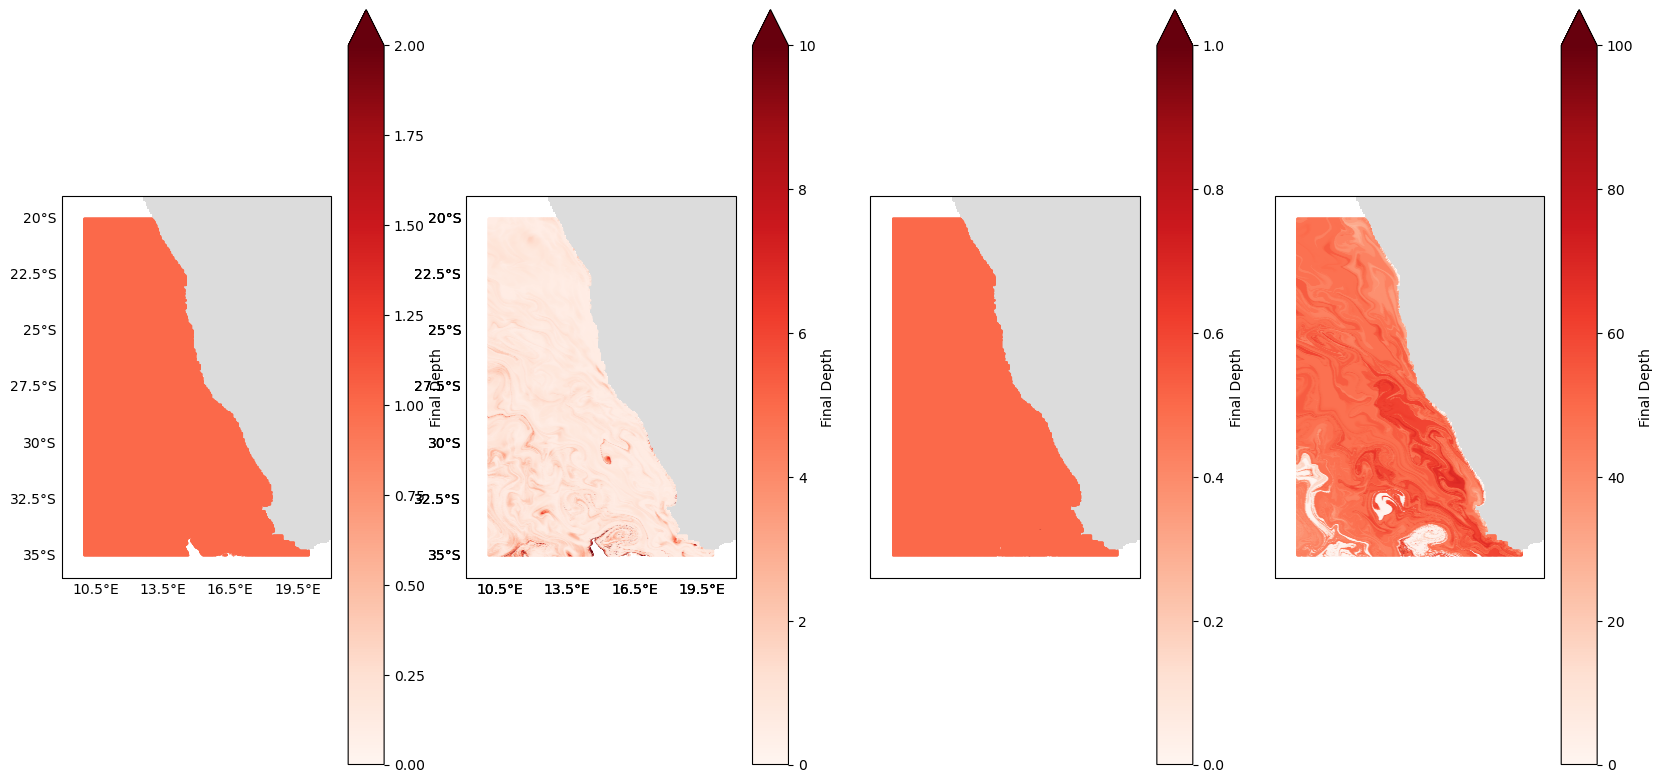

In [9]:
# ig = plt.figure(figsize=(16,10), dpi=100)
custom_size=10
colormap = colors.ListedColormap(['gainsboro', 'white'])


fig = plt.figure(figsize=(20,10), dpi=100)
# fig.suptitle("Temperature, Salinity and vertical velocity: 15 Dec 2017 at depth: {0} m".format(w_ds.depthw[level].values), fontsize=15)
gs = fig.add_gridspec(nrows=1, ncols=4)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

# Near Amazon river- 4-5 month simulations
ax1.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
ax1.set_xlim(9, 21)
ax1.set_ylim(-36, -19)
im=ax1.scatter(ds2D['lon'][:,0].values, ds2D['lat'][:,0].values, c=ds2D['z'][:,-1].values, cmap="Reds", vmin=0, vmax=2,s=0.1)
cbar=fig.colorbar(im, ax=ax1, label='Final Depth', extend='max')

print("2D: ", np.nanmin(ds2D['z'][:,-1].values), np.nanmax(ds2D['z'][:,-1].values))


ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

# Near Amazon river- 4-5 month simulations
ax2.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
ax2.set_xlim(9, 21)
ax2.set_ylim(-36, -19)
im1=ax2.scatter(ds2D['lon'][:,0].values, ds2D['lat'][:,0].values, c=ds3D['z'][:,-1].values, cmap="Reds", vmin=0, vmax=10,s=0.1)
cbar1=fig.colorbar(im1, ax=ax2, label='Final Depth', extend='max')

print("3D: ", np.nanmin(ds3D['z'][:,-1].values), np.nanmax(ds3D['z'][:,-1].values))


ax3 = fig.add_subplot(gs[2], projection=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

# Near Amazon river- 4-5 month simulations
ax3.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
ax3.set_xlim(9, 21)
ax3.set_ylim(-36, -19)
im2=ax3.scatter(ds2D['lon'][:,0].values, ds2D['lat'][:,0].values, c=dsdvm['z'][:,-1].values, cmap="Reds", vmin=0, vmax=1,s=0.1)
cbar2=fig.colorbar(im2, ax=ax3, label='Final Depth', extend='max')

print("DVM: ", np.nanmin(dsdvm['z'][:,-1].values), np.nanmax(dsdvm['z'][:,-1].values))


ax4 = fig.add_subplot(gs[3], projection=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

# Near Amazon river- 4-5 month simulations
ax4.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
ax4.set_xlim(9, 21)
ax4.set_ylim(-36, -19)
im3=ax4.scatter(ds2D['lon'][:,0].values, ds2D['lat'][:,0].values, c=dsbp['z'][:,-1].values, cmap="Reds", vmin=0, vmax=100,s=0.1)
cbar3=fig.colorbar(im3, ax=ax4, label='Final Depth', extend='max')

print("BP: ", np.nanmin(dsbp['z'][:,-1].values), np.nanmax(dsbp['z'][:,-1].values))

plt.show()


In [19]:
dsbp['lon'][:,-1].values


array([ 7.33883994,  7.68747823,  7.90207872, ..., 14.04097408,
       13.1292047 , 13.30824054])

In [9]:
dsbp.z[id,].values, dsbp.time[id,].values

(array([ 1.        ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
         0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
         0.5       ,  0.5       ,  0.5       ,  0.5       ,  1.65477587,
         3.39098991,  4.68868536,  5.07219833,  4.82721916,  4.31986533,
         3.74489087,  3.67913318,  4.57308997,  6.10363539,  7.69936241,
         9.60522038, 11.49929476, 13.38292693, 15.48493439, 18.32960511,
        21.60519817, 25.13980695, 28.77342961, 32.14018775, 35.61949154,
        39.13171898, 41.95369471, 44.20820795, 46.49608071, 48.1416727 ,
        48.39548347, 49.44248224, 51.11211087, 52.48027436, 53.64662008,
        53.64223855, 53.63933366, 53.74596073, 53.71812484, 53.64485081,
        53.73170518, 54.72075544, 55.56740672, 56.67754894, 57.4403315 ,
        58.3031347 , 59.34789325, 60.02302675, 60.02959697, 60.02831966,
        60.03504508, 60.14438215, 60.12526818, 60.04342436, 60.251959  ,
        60.47468513, 61.19423875, 62.37640135, 65.1

<h3> Following based on Test run with 10 particles with different densities released at the same location and time.

In [5]:
test_bp= xr.open_zarr(home_folder + "Test_3D_BP_BenguelaUpwR_pt2gridres_Dec2017_1z_100days_radius1mm_density1010.zarr") 


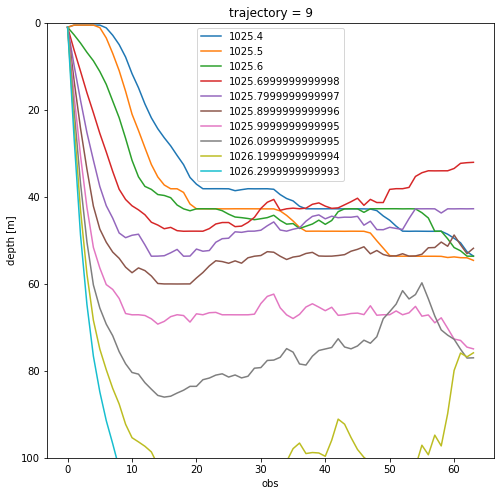

In [6]:
den=np.arange(1025.4,1026.4,0.1)
fig=plt.figure(figsize=(8,8))
ax=plt.axes()
for i in range(10):
    test_bp.z[i,:].plot(ax=ax, label=den[i]) 

ax.set_ylim(0,100)
ax.legend()
ax.invert_yaxis()

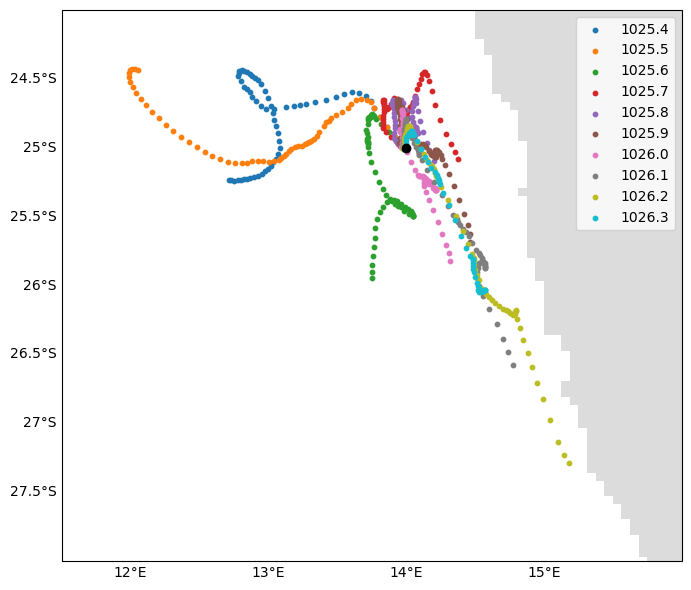

In [7]:
custom_size=10
fig = plt.figure(figsize=(8,8), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = colors.ListedColormap(['gainsboro', 'white'])

# Near Amazon river- 4-5 month simulations
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
# ax.set_xlim(8,18)
# ax.set_ylim(-30,-20)
ax.set_xlim(11.5,16)
ax.set_ylim(-28,-24)
for i in range(len(den)):
    ax.scatter(test_bp['lon'][i,:], test_bp['lat'][i,:], s=10, label=round(den[i],1))
ax.scatter(14, -25, c='k')
ax.legend()
plt.show()